<a href="https://colab.research.google.com/github/haticebaydemir/Text_Preprocessing_and_Text_Visualization/blob/main/Text_Preprocessing_and_Text_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem: Wikipedia metinleri içeren veri setine metin ön işleme ve görselleştirme yapınız.

# Görev 1: Metin Ön İşleme İşlemlerini Gerçekleştiriniz

Adım 1: Metin ön işleme için clean_text adında fonksiyon oluşturunuz. Fonksiyon;

• Büyük küçük harf dönüşümü,

• Noktalama işaretlerini çıkarma,

• Numerik ifadeleri çıkarma Işlemlerini gerçekleştirmeli.

Adım 2: Yazdığınız fonksiyonu veri seti içerisindeki tüm metinlere uygulayınız.

Adım 3: Metin içinde öznitelik çıkarımı yaparken önemli olmayan kelimeleri çıkaracak remove_stopwords adında fonksiyon yazınız.

Adım 4: Yazdığınız fonksiyonu veri seti içerisindeki tüm metinlere uygulayınız.

Adım 5: Metinde az geçen (1000'den az, 2000'den az gibi) kelimeleri bulunuz. Ve bu kelimeleri metin içerisinden çıkartınız.

Adım 6: Metinleri tokenize edip sonuçları gözlemleyiniz.

Adım 7: Lemmatization işlemi yapınız.


# Görev 2: Veriyi Görselleştiriniz
Adım 1: Metindeki terimlerin frekanslarını hesaplayınız.

Adım 2: Bir önceki adımda bulduğunuz terim frekanslarının Barplot grafiğini oluşturunuz.

Adım 3: Kelimeleri WordCloud ile görselleştiriniz.

# Görev 3: Tüm Aşamaları Tek Bir Fonksiyon Olarak Yazınız
Adım 1: Metin ön işleme işlemlerini gerçekleştiriniz.

Adım 2: Görselleştirme işlemlerini fonksiyona argüman olarak ekleyiniz.

Adım 3: Fonksiyonu açıklayan 'docstring' yazınız.

# Kütüphaneler

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from warnings import filterwarnings

In [81]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 200)

In [82]:
import zipfile
import io
from google.colab import drive

# Google Drive'ı bağlayın
drive.mount('/content/drive')

# ZIP dosyasının yolu
zip_file_path = '/content/drive/MyDrive/Text_Preprocessing_and_Text_Visualization/wikipedia.zip'

# ZIP dosyasını açın ve CSV dosyasını Pandas DataFrame'e yükleyin
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # ZIP dosyasındaki CSV dosyalarının isimlerini al
    csv_file_name = [name for name in zip_ref.namelist() if name.endswith('.csv')][0]

    # CSV dosyasını bellekten okuma
    with zip_ref.open(csv_file_name) as my_file:
        df = pd.read_csv(my_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
df.head()
df = df[:2000] # İlk 2bin satırı kullan

In [84]:
df.head()

,Unnamed: 0,text
0,1,Anovo\n\nAnovo (formerly A Novo) is a computer...
1,2,Battery indicator\n\nA battery indicator (also...
2,3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
3,4,CAVNET\n\nCAVNET was a secure military forum w...
4,5,CLidar\n\nThe CLidar is a scientific instrumen...


In [85]:
df.shape

(2000, 2)

#Görev 1

In [86]:
def clean_text(text):
  text = text.str.lower() #Büyük küçük harf dönüşümü
  text = text.str.replace('[^\w\s]', '') #Noktalama işaretlerini çıkarma
  text = text.str.replace("\n" , '')
  text = text.str.replace('\d', '') #Numerik ifadeleri çıkarma
  return text

In [87]:
df["text"] = clean_text(df["text"])

In [88]:
df.head()

,Unnamed: 0,text
0,1,anovoanovo (formerly a novo) is a computer ser...
1,2,battery indicatora battery indicator (also kno...
2,3,"bob peaserobert allen pease (august 22, 1940â ..."
3,4,cavnetcavnet was a secure military forum which...
4,5,clidarthe clidar is a scientific instrument us...


In [89]:
#Stopwords - Bilgi içermeyen kelimeleri (stopwords) veriden çıkarınız
def remove_stopwords (text):

  stop_words = stopwords.words('english')
  text = text.apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
  return text

df["text"] = remove_stopwords(df["text"])

In [90]:
# Metinde az geçen (1000'den az, 2000'den az gibi) kelimeleri bulunuz.
pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]

,count
1863;,1
prentice,1
guncotton.small,1
wolfsberg,1
lenk,1
...,...
m.52,1
sub-sonic,1
attlee's,1
1949.the,1


In [91]:
#  Ve bu kelimeleri metin içerisinden çıkartınız.
sil = pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sil))

In [92]:
# Metinleri tokenize edip sonuçları gözlemleyiniz.
!pip install -U textblob nltk
import nltk
nltk.download('punkt')
from textblob import TextBlob

# Metinleri tokenize et
tokenized_texts = df["text"].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [93]:
!pip install -U nltk
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # Ekstra dil desteği için

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [94]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [95]:
df['text'] = df['text'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

In [96]:
df.head()

,Unnamed: 0,text
0,1,anovoanovo (formerly novo) computer service co...
1,2,battery indicatora battery indicator (also kno...
2,3,"bob peaserobert allen pea (august 22, 1940â â€..."
3,4,cavnetcavnet secure military forum became oper...
4,5,clidarthe clidar scientific instrument used me...


# Görev 2: Veriyi Görselleştiriniz

In [97]:
# Metindeki terimlerin frekanslarını hesaplayınız. (İpucu: Barplot grafiği için gerekli)
tf = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [98]:
tf.head()

,index,0
0,company,1862.00
1,anovoanovo,1.00
2,1.6,3.00
3,four,473.00
4,year,907.00


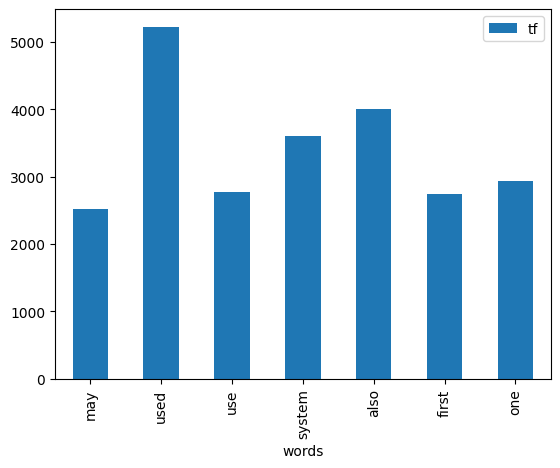

In [99]:
# Barplot grafiğini oluşturunuz.
tf.columns = ["words", "tf"]# Sütunların isimlendirilmesi
# 5000'den fazla geçen kelimelerin görselleştirilmesi
tf[tf["tf"] > 2000].plot.bar(x="words", y="tf")
plt.show()

In [100]:
# Kelimeleri WordCloud ile görselleştiriniz.
text = " ".join(i for i in df["text"]) # kelimeleri birleştirdik.

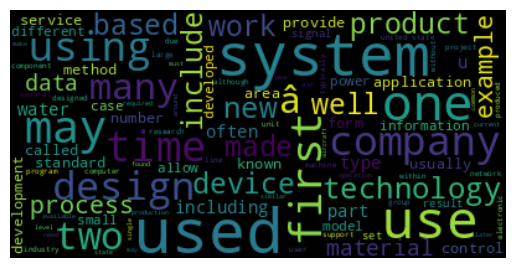

In [101]:
# wordcloud görselleştirmenin Özelliklerini belirliyoruz
wordcloud = WordCloud(max_font_size=50,
max_words=100,
background_color="black").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Görev 3: Tüm Aşamaları Tek Bir Fonksiyon Olarak Yazınız

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


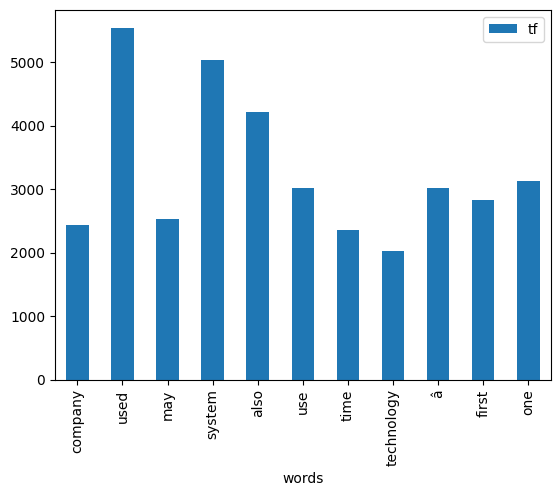

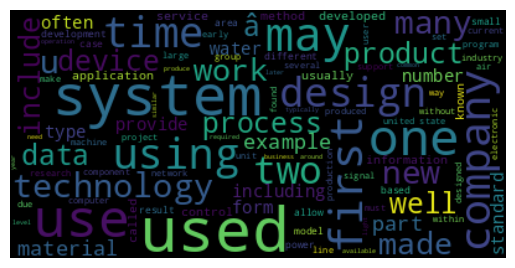

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from nltk.stem import WordNetLemmatizer
from warnings import filterwarnings
import zipfile
import io
from google.colab import drive
import nltk

# Ayarlar
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 200)

# Google Drive'ı bağlayın
drive.mount('/content/drive')

# ZIP dosyasının yolu
zip_file_path = '/content/drive/MyDrive/Text_Preprocessing_and_Text_Visualization/wikipedia.zip'

# ZIP dosyasını açın ve CSV dosyasını Pandas DataFrame'e yükleyin
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    csv_file_name = [name for name in zip_ref.namelist() if name.endswith('.csv')][0]
    with zip_ref.open(csv_file_name) as my_file:
        df = pd.read_csv(my_file)

# Veriyi temizle
df = df[:2000]  # İlk 2000 satırı kullan
def clean_text(text):
    text = text.str.lower()
    text = text.str.replace('[^\w\s]', '', regex=True)
    text = text.str.replace("\n", '', regex=True)
    text = text.str.replace('\d', '', regex=True)
    return text
df["text"] = clean_text(df["text"])

# Stopwords çıkarma
stop_words = stopwords.words('english')
def remove_stopwords(text):
    return text.apply(lambda x: " ".join(x for x in str(x).split() if x not in stop_words))
df["text"] = remove_stopwords(df["text"])

# Metinde az geçen kelimeleri çıkart
sil = pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sil))

# Metinleri tokenize et
nltk.download('punkt')
tokenized_texts = df["text"].apply(lambda x: TextBlob(x).words)

# Lemmatizasyon
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

# Terim frekanslarını hesapla
tf = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]

# Barplot grafiğini oluştur
tf[tf["tf"] > 2000].plot.bar(x="words", y="tf")
plt.show()

# Kelimeleri WordCloud ile görselleştir
text = " ".join(i for i in df["text"])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
